<a href="https://colab.research.google.com/github/promiseeselojor/python-data-science-templates/blob/main/Quantium_Data_Analytics_Virtual_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantium Virtual Internship - Retail Strategy and Analytics**

## **Import libraries**

In [2]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 





## **Loading and viewing the Data**

In [5]:
#load the data into the respective dataframes

purchase = pd.read_csv("QVI_purchase_behaviour.csv")
transaction = pd.read_excel("QVI_transaction_data.xlsx")


In [6]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# **Preparing The Data (Data Cleaning)**

In [8]:
#Displayes the numbers of roles and columns for the purchase dataframe
purchase.shape

(72637, 3)

In [9]:
#displays the numbers of roles and columns for the transaction dataframe
transaction.shape

(264836, 8)

In [10]:
#Return info on the tansaction dataset
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


The date column isnt in a datetime data type, rather its in int64 excel date format. We need to convert it to datetime. We do this using the to.datetime() function from pandas

In [11]:
#convert date column to a date format
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')

transaction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [12]:
#examine the PROD_NAME
print(transaction['PROD_NAME'])


0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object


Since we are only performing analysis on chips, we need to make sure all the products in that column are chip brands and remove any other brand or product that is not considered a chip. I'm going to use the re library from python

In [44]:
#check if the PROD_NAME column contains the word 'chip' and its varations(chips,chp) and remove the rows that dont match
mask = transaction['PROD_NAME'].str.lower().str.contains(r'chips|chip|chp', case=False, na=False)

chip_transaction = transaction[mask]

chip_transaction.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


Perform summary statistics to check if there any outliers or null values.

In [45]:
#perform summary statistics
chip_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,87335.000000,8.733500e+04,87335.000000,87335.000000,87335.000000,87335.000000
mean,135.525185,1.360239e+05,135604.567127,49.949619,1.910620,7.286420
std,76.853472,8.095134e+04,78071.398801,34.450103,1.007451,3.943887
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.010000e+04,68056.500000,16.000000,2.000000,6.000000
50%,131.000000,1.314830e+05,135822.000000,42.000000,2.000000,6.600000
75%,203.000000,2.032830e+05,203488.000000,78.000000,2.000000,8.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,200.000000,650.000000


It seems we have an outlier in the product quantity and product sales. A purchase of 200 chips was made. Let's examine this record

In [46]:
#find the row where the PROD_QTY equals 200
chip_transaction[chip_transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We have two records of 200 chips being bought. The cocurence was just twice within 2 years, which measn it's most likely a commercial customer who may just be buying wholesale to resell. We wont need this in our dataset so we are going to remove the rows

In [47]:
#drop rows where the PROD_QTY is equal 200
chip_transaction = chip_transaction.drop(chip_transaction[chip_transaction['PROD_QTY'] == 200].index)

#check if rows have been deleted
chip_transaction[chip_transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


Next we take a look at the number of transactions over the overall time period to check if there's any missing data in the dataset. 

In [48]:
chip_transaction['DATE'].value_counts()

2018-12-24    327
2018-12-19    302
2018-12-23    300
2019-06-14    288
2018-12-21    286
             ... 
2019-06-22    204
2019-01-15    200
2018-07-01    198
2018-08-17    192
2018-10-18    187
Name: DATE, Length: 364, dtype: int64

We have 364 dates in total isntead of 365 dates meaning there's a missing date. To find this missing date, we create a sequence of date ranging from 1st July 2018 to 1st of Jun 2019 and chart the number of transactions during this time period


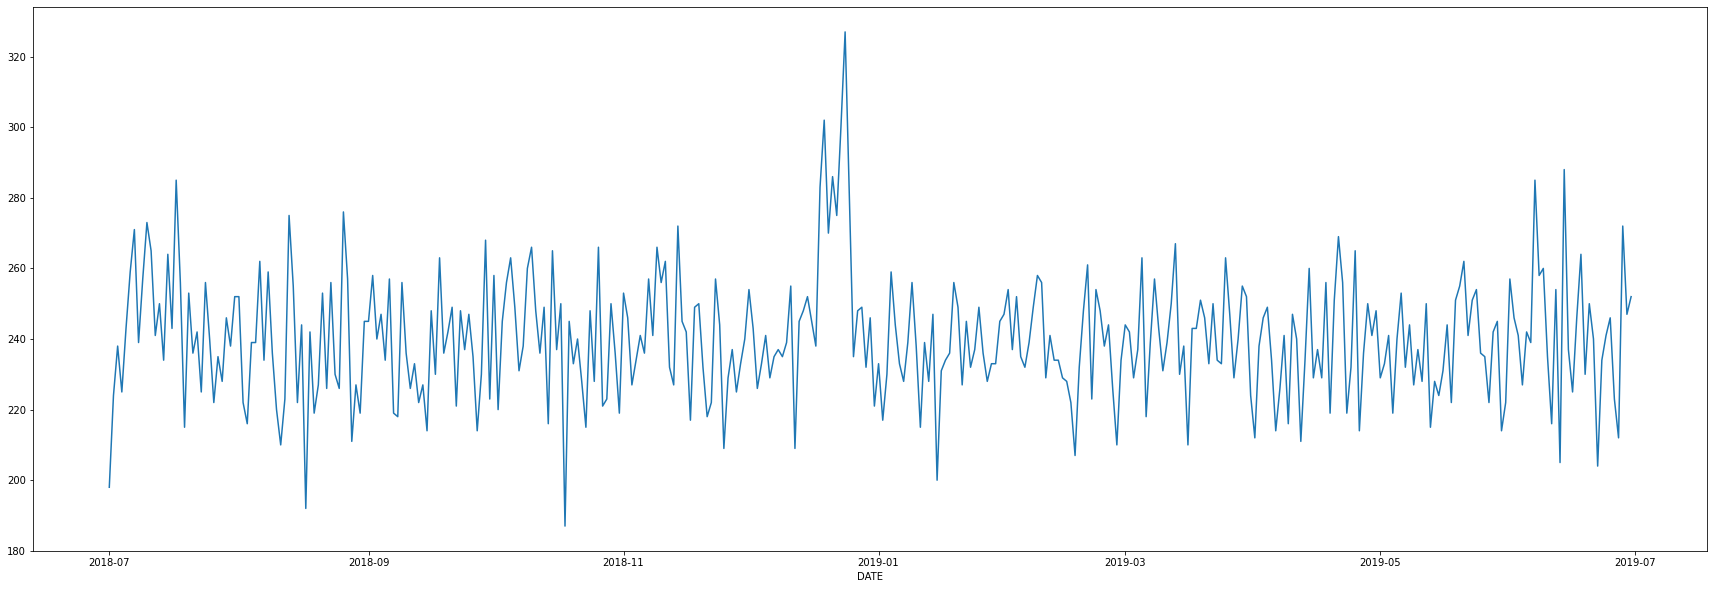

In [49]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')


#group the dataframe by Date column and get the number transactions per date
transactions_by_date = chip_transaction.groupby(chip_transaction['DATE'].dt.date).size()

#plot the graph
fig = plt.figure(figsize=(30, 10))
transactions_by_date.plot()
plt.show()

It seems there are no sales on december 25th christmas day. Lets check the dataframe for transactions on dec 25th

In [50]:
start_date = '2018-12-24'
end_date = '2018-12-25'
chip_transaction[(chip_transaction['DATE'] > start_date) & (chip_transaction['DATE'] <= end_date)]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


Next, we are going to add new columns and features which will be useful for our analysis. We'll be adding pack size and brand name

In [51]:
#Pack size
chip_transaction.head()

#take the last 5 digits of the prodname
chip_transaction['PACK_SIZE'] = chip_transaction['PROD_NAME'].str[-4:-1]

chip_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
...,...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175


In [52]:
chip_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87333 entries, 0 to 264834
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            87333 non-null  datetime64[ns]
 1   STORE_NBR       87333 non-null  int64         
 2   LYLTY_CARD_NBR  87333 non-null  int64         
 3   TXN_ID          87333 non-null  int64         
 4   PROD_NBR        87333 non-null  int64         
 5   PROD_NAME       87333 non-null  object        
 6   PROD_QTY        87333 non-null  int64         
 7   TOT_SALES       87333 non-null  float64       
 8   PACK_SIZE       87333 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 6.7+ MB


The Pack Size column is an object datatype. We need to convert it to an integer data type

In [53]:
#convert the column PACK_SIZE from object to integer datatype
chip_transaction['PACK_SIZE'] = chip_transaction['PACK_SIZE'].astype(int)
chip_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87333 entries, 0 to 264834
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            87333 non-null  datetime64[ns]
 1   STORE_NBR       87333 non-null  int64         
 2   LYLTY_CARD_NBR  87333 non-null  int64         
 3   TXN_ID          87333 non-null  int64         
 4   PROD_NBR        87333 non-null  int64         
 5   PROD_NAME       87333 non-null  object        
 6   PROD_QTY        87333 non-null  int64         
 7   TOT_SALES       87333 non-null  float64       
 8   PACK_SIZE       87333 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 6.7+ MB


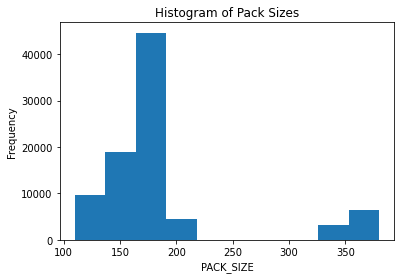

In [54]:
#plot histogram of the PACK_SIZE
plt.hist(chip_transaction['PACK_SIZE'], bins=10)

plt.xlabel('PACK_SIZE')
plt.ylabel('Frequency')
plt.title('Histogram of Pack Sizes')
plt.show()

In [57]:
#BRAND NAME

#take the first word from the PROD_NAME column and pass onto the BRAND_NAME column
chip_transaction['BRAND_NAME'] = chip_transaction['PROD_NAME'].str.split().str[0]

#check
chip_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
...,...,...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150,Kettle
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175,Thins


The Date column in the transaction dataset is incorrectly formated and wont be useful in our analysis. Trying to format it using the datetime function will result in an error cause of the improper formatting

In [43]:
chip_transaction['BRAND_NAME'].unique()

array(['Natural', 'Smiths', 'Kettle', 'Doritos', 'Thins', 'Dorito',
       'Cobs', 'French', 'WW', 'Tostitos'], dtype=object)

## **Examining Customer Dataset**

In [58]:
#examining customer data
purchase.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [59]:
purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [60]:
purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Let's check if we have any null values in the purchase dataset

In [61]:
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## **Merging Dataframes**

Since there are no missing values and everything seems fine, we can proceed to merging the dataframes. We are going to use a left inner join

In [62]:
#perform a left join on the transaction and purchase dataframe
merged_df = pd.merge(chip_transaction, purchase, how='left', on='LYLTY_CARD_NBR')
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87333 entries, 0 to 87332
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              87333 non-null  datetime64[ns]
 1   STORE_NBR         87333 non-null  int64         
 2   LYLTY_CARD_NBR    87333 non-null  int64         
 3   TXN_ID            87333 non-null  int64         
 4   PROD_NBR          87333 non-null  int64         
 5   PROD_NAME         87333 non-null  object        
 6   PROD_QTY          87333 non-null  int64         
 7   TOT_SALES         87333 non-null  float64       
 8   PACK_SIZE         87333 non-null  int64         
 9   BRAND_NAME        87333 non-null  object        
 10  LIFESTAGE         87333 non-null  object        
 11  PREMIUM_CUSTOMER  87333 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 8.7+ MB


In [63]:
#check for null values
merged_df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Everything looks good. There are no null values. Let's save the resulting merged dataset in csv format so we can always access our work

In [64]:
merged_df.to_csv('QVI_Final_Data.csv', index=False)


# **Analyzing the Data**

## **Analysis on Customer Segments**

First we need to define the key questions and metrics that needs answering

*   Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
*   How many customers are in each segment?
*   How many chips are bought per customer by segment?
*   What’s the average chip price by customer segment?

Let's start with the first question. Let's calculate the total sales grouped by 'LIFESTAGE' and 'PREMIUM_CUSTOMERS'

In [70]:
# Create a pivot table of the 'TOT_SALES' grouped by 'PREMIUM CUSTOMER' and 'LIFESTAGE'
pivot_table = merged_df.pivot_table(values=['TOT_SALES'], index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc='sum')

#display pivot table
pivot_table


TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   12090.80
                 NEW FAMILIES              7097.05
                 OLDER FAMILIES           54808.85
                 OLDER SINGLES/COUPLES    44910.30
                 RETIREES                 37417.30
                 YOUNG FAMILIES           45626.85
                 YOUNG SINGLES/COUPLES    20277.40
Mainstream       MIDAGE SINGLES/COUPLES   29978.75
                 NEW FAMILIES              5640.40
                 OLDER FAMILIES           34709.75
                 OLDER SINGLES/COUPLES    44114.10
                 RETIREES                 50673.45
                 YOUNG FAMILIES           30941.65
                 YOUNG SINGLES/COUPLES    51434.40
Premium          MIDAGE SINGLES/COUPLES   18930.65
                 NEW FAMILIES              3720.10
                 OLDER FAMILIES           25851.00
                 OLDER SINGLES/COUPLES    43439.95
                 RETIREES                 31462.95
                 YOUNG FAMILIES           27869.40
                 YOUNG SINGLES/COUPLES    14064.40

<Figure size 26424x18432 with 0 Axes>

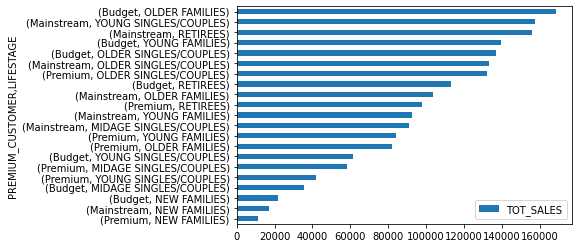

In [ ]:
#plot total sales by LIFESTAGE and PREMIUM_CUSTOMERS
plt.figure(figsize= (367,256))
pivot_table.plot(kind='barh', stacked = True)
plt.show()


A large of majority of sales came from the Budget-older families, mainstream- young single/couples, and mainstream-retirees. We need to find out if the higher sales are due to there being more customers who buy chips

In [ ]:
#create a pivot table of number of purchases grouped by  'PREMIUM_CUSTOMER' and 'LIFESTAGE'
pivot_table2 = merged_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', aggfunc='size')

#display pivot table
pivot_table2

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,5020,11874,8216
NEW FAMILIES,3005,2325,1589
OLDER FAMILIES,23160,14244,11192
OLDER SINGLES/COUPLES,18407,18318,17754
RETIREES,15201,21466,13096
YOUNG FAMILIES,19122,12907,11563
YOUNG SINGLES/COUPLES,9242,20854,6281


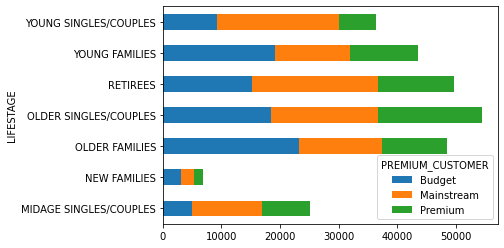

In [ ]:
#plot total number of purhases grouped by LIFESTAGE and PREMIUM_CUSTOMERS

pivot_table2.plot(kind='barh', stacked = True)
plt.show()

A large marjority of purchases were made from the Budget-older and younger families, and  Mainstream-retirees. Let's also check if the higher sales is driven by more units of chips being bought

In [ ]:
# Create a pivot table of 'PROD_QTY' grouped by 'PREMIUM CUSTOMER' and 'LIFESTAGE'
pivot_table3 = merged_df.pivot_table(values=['PROD_QTY'], index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc='sum')

pivot_table3 = pivot_table.sort_values(by = 'PROD_QTY', ascending = True)

#display pivot table
pivot_table3


PROD_QTY
PREMIUM_CUSTOMER LIFESTAGE                       
Premium          NEW FAMILIES                2957
Mainstream       NEW FAMILIES                4319
Budget           NEW FAMILIES                5571
                 MIDAGE SINGLES/COUPLES      9496
Premium          YOUNG SINGLES/COUPLES      11331
                 MIDAGE SINGLES/COUPLES     15526
Budget           YOUNG SINGLES/COUPLES      16671
Premium          OLDER FAMILIES             22171
                 YOUNG FAMILIES             22406
Mainstream       MIDAGE SINGLES/COUPLES     22699
Premium          RETIREES                   24884
Mainstream       YOUNG FAMILIES             25044
                 OLDER FAMILIES             27756
Budget           RETIREES                   28764
Premium          OLDER SINGLES/COUPLES      33986
Mainstream       OLDER SINGLES/COUPLES      34997
Budget           OLDER SINGLES/COUPLES      35220
                 YOUNG FAMILIES             37111
Mainstream       YOUNG SINGLES/COUPLES      38632
                 RETIREES                   40518
Budget           OLDER FAMILIES             45065

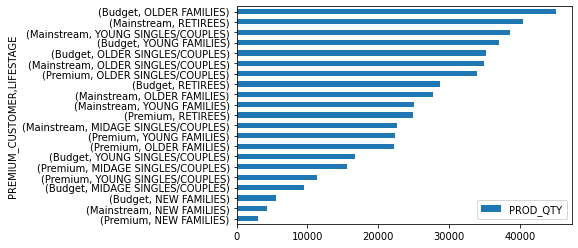

In [ ]:
#plot total product quantity by LIFESTAGE and PREMIUM_CUSTOMERS
pivot_table3.plot(kind='barh', stacked = True)
plt.show()

In [ ]:
# Create a pivot table of 'AVG_PRICE _PER_UNIT' grouped by 'PREMIUM CUSTOMER' and 'LIFESTAGE'
pivot_table4 = merged_df.pivot_table(values=['AVG_PRICE_PER_UNIT'], index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc='mean')

#display pivot table
pivot_table4


AVG_PRICE_PER_UNIT
PREMIUM_CUSTOMER LIFESTAGE                                 
Budget           MIDAGE SINGLES/COUPLES            3.728496
                 NEW FAMILIES                      3.919251
                 OLDER FAMILIES                    3.733344
                 OLDER SINGLES/COUPLES             3.877022
                 RETIREES                          3.924883
                 YOUNG FAMILIES                    3.753659
                 YOUNG SINGLES/COUPLES             3.637681
Mainstream       MIDAGE SINGLES/COUPLES            4.000101
                 NEW FAMILIES                      3.916581
                 OLDER FAMILIES                    3.727383
                 OLDER SINGLES/COUPLES             3.803800
                 RETIREES                          3.833343
                 YOUNG FAMILIES                    3.707097
                 YOUNG SINGLES/COUPLES             4.071485
Premium          MIDAGE SINGLES/COUPLES            3.752915
                 NEW FAMILIES                      3.871743
                 OLDER FAMILIES                    3.704543
                 OLDER SINGLES/COUPLES             3.887220
                 RETIREES                          3.921323
                 YOUNG FAMILIES                    3.752402
                 YOUNG SINGLES/COUPLES             3.645518

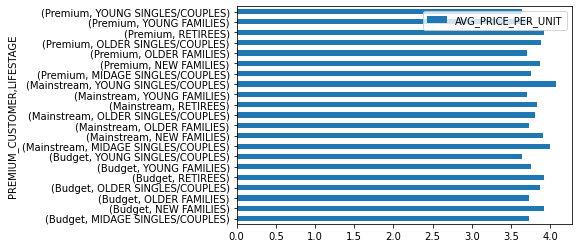

In [ ]:
#plot average price per unit by LIFESTAGE and PREMIUM_CUSTOMERS
pivot_table4.plot(kind='barh', stacked = True)
plt.show()

From the graph, we can see that Mainstream-Young Singles/Couples and Mainstream -Midage Singles/Couples are willing to pay more per packet of chips compared to their budget and premium counterparts

# **Conclusion**

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. 

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.

This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.
